In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [6]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1975/1975 [==============================] - 13s 7ms/step - loss: 0.0088
Epoch 2/100
1975/1975 [==============================] - 11s 5ms/step - loss: 0.0028: 6s - - ETA:  - ETA: 1s - loss
Epoch 3/100
1975/1975 [==============================] - 11s 6ms/step - loss: 0.0025
Epoch 4/100
1975/1975 [==============================] - 11s 6ms/step - loss: 0.0023
Epoch 5/100
1975/1975 [==============================] - 11s 6ms/step - loss: 0.0028
Epoch 6/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0022
Epoch 7/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0020
Epoch 8/100
1975/1975 [==============================] - 12s 6ms/step - loss: 0.0023
Epoch 9/100
1975/1975 [==============================] - 11s 6ms/step - loss: 0.0019
Epoch 10/100
1975/1975 [==============================] - 11s 6ms/step - loss: 0.0019 ETA: 1s - los - ETA: 0s - loss: 0.00
Epoch 11/100
1975/1975 [==============================] - 11s 6ms/step - loss: 0.

1975/1975 [==============================] - 13s 6ms/step - loss: 7.4126e-04
Epoch 92/100
1975/1975 [==============================] - 13s 6ms/step - loss: 6.0868e-04
Epoch 93/100
1975/1975 [==============================] - 12s 6ms/step - loss: 6.4996e-04
Epoch 94/100
1975/1975 [==============================] - 11s 6ms/step - loss: 6.2673e-04
Epoch 95/100
1975/1975 [==============================] - 833s 422ms/step - loss: 5.9890e-04
Epoch 96/100
1975/1975 [==============================] - 9s 4ms/step - loss: 5.8649e-04
Epoch 97/100
1975/1975 [==============================] - 7s 3ms/step - loss: 6.9577e-04
Epoch 98/100
1975/1975 [==============================] - 7s 3ms/step - loss: 6.7910e-04
Epoch 99/100
1975/1975 [==============================] - 7s 3ms/step - loss: 6.3372e-04
Epoch 100/100
1975/1975 [==============================] - 7s 3ms/step - loss: 6.6686e-04


In [8]:
dataset_test = pd.read_csv('tatatest.csv')

In [9]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

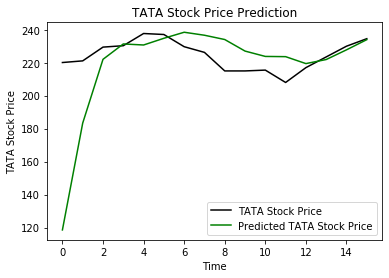

In [10]:
real_stock_price = dataset_test['Open']
plt.plot(real_stock_price, color='black', label='TATA Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()